<a href="https://colab.research.google.com/github/icsd13152/TextExtraction_from_image/blob/main/Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install gtts
# !pip install easyocr

import nltk
import re
from textblob import TextBlob
import spacy
from gtts import gTTS
import os
from spacy import displacy 
import cv2
# import pytesseract
import numpy as np
from nltk.stem import WordNetLemmatizer
import easyocr
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from tabulate import tabulate
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#Digital Image

In [55]:
reader = easyocr.Reader(['en'], gpu=False)
images = ['essay.jpg']
Docs = list()
for img in images:
    result = reader.readtext(img)
    Docs.append(result)
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[199, 140], [417, 140], [417, 172], [199, 172]], 'Steps for _Essay Writing', 0.658815650242347), ([[140, 193], [1084, 193], [1084, 225], [140, 225]], 'Throughout your life at college, you will always come across a professor who likes to give out topics for', 0.7346766570850877), ([[140, 222], [1082, 222], [1082, 254], [140, 254]], "essay writing: This can't be helped except do the assignment vourself and hope to impress the professor", 0.9498841474613057), ([[140, 256], [1084, 256], [1084, 286], [140, 286]], 'with your writing prowess. However; writing an essay is not a simple feat: In fact, when you think about', 0.4948449157166386), ([[140, 290], [264, 290], [264, 316], [140, 316]], 'it, your essay', 0.48043266514846805), ([[318, 288], [706, 288], [706, 316], [318, 316]], 'could make or break your academic career', 0.8020862332542531), ([[139, 339], [1082, 339], [1082, 366], [139, 366]], 'Essays may seem to be just an assignment to some: However; essay writing is more than just th

In [56]:
font = cv2.FONT_HERSHEY_SIMPLEX
documents = list()

# print(Docs)
for content in Docs:
    # print(content)
    tmpList = list()
    for text in content:
        tmpList.append(text[1])
      
    documents.append(tmpList)
 
# print(documents)
finalDocs = list()
for d in documents:
    finalDocs.append(' '.join(i for i in d))

# finalDoc = ' '.join(i for i in document)
print(finalDocs)

# img = cv2.imread('Instagram.jpg')
# spacer = 100
# for detection in result: 
#     top_left = tuple(detection[0][0])
#     bottom_right = tuple(detection[0][2])
#     text = detection[1]
#     img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
#     img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
#     spacer+=15
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()
# img = cv2.imread('annie-spratt-askpr0s66Rg-unsplash.jpg')
# spacer = 100
# for detection in result: 
#     top_left = tuple(detection[0][0])
#     bottom_right = tuple(detection[0][2])
#     text = detection[1]
#     img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
#     img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
#     spacer+=15
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()

["Steps for _Essay Writing Throughout your life at college, you will always come across a professor who likes to give out topics for essay writing: This can't be helped except do the assignment vourself and hope to impress the professor with your writing prowess. However; writing an essay is not a simple feat: In fact, when you think about it, your essay could make or break your academic career Essays may seem to be just an assignment to some: However; essay writing is more than just that: It is a great tool that every person should learn how to use correctly: An essay is an avenue where yoU can conveniently have your  voice heard by an important audience. More than just   making as requirement; you can use it to impress another person, like your teacher; and show him how wonderful your mind is. Use it as communication tool to which Vou can freely express whatever you felt towards a certain idea_ Nobody can steal your thoughts nor influence your ideas towards something: Writing an essa

# Text Analysis using NLTK

In [59]:
# tokensNLTK = list()
# for sete in finalDocs:
tokensNLTK = nltk.tokenize.word_tokenize(finalDocs[0])
print(tokensNLTK)
nltk.pos_tag(tokensNLTK)

['Steps', 'for', '_Essay', 'Writing', 'Throughout', 'your', 'life', 'at', 'college', ',', 'you', 'will', 'always', 'come', 'across', 'a', 'professor', 'who', 'likes', 'to', 'give', 'out', 'topics', 'for', 'essay', 'writing', ':', 'This', 'ca', "n't", 'be', 'helped', 'except', 'do', 'the', 'assignment', 'vourself', 'and', 'hope', 'to', 'impress', 'the', 'professor', 'with', 'your', 'writing', 'prowess', '.', 'However', ';', 'writing', 'an', 'essay', 'is', 'not', 'a', 'simple', 'feat', ':', 'In', 'fact', ',', 'when', 'you', 'think', 'about', 'it', ',', 'your', 'essay', 'could', 'make', 'or', 'break', 'your', 'academic', 'career', 'Essays', 'may', 'seem', 'to', 'be', 'just', 'an', 'assignment', 'to', 'some', ':', 'However', ';', 'essay', 'writing', 'is', 'more', 'than', 'just', 'that', ':', 'It', 'is', 'a', 'great', 'tool', 'that', 'every', 'person', 'should', 'learn', 'how', 'to', 'use', 'correctly', ':', 'An', 'essay', 'is', 'an', 'avenue', 'where', 'yoU', 'can', 'conveniently', 'have',

[('Steps', 'NNS'),
 ('for', 'IN'),
 ('_Essay', 'NN'),
 ('Writing', 'VBG'),
 ('Throughout', 'IN'),
 ('your', 'PRP$'),
 ('life', 'NN'),
 ('at', 'IN'),
 ('college', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('will', 'MD'),
 ('always', 'RB'),
 ('come', 'VB'),
 ('across', 'IN'),
 ('a', 'DT'),
 ('professor', 'NN'),
 ('who', 'WP'),
 ('likes', 'VBZ'),
 ('to', 'TO'),
 ('give', 'VB'),
 ('out', 'RP'),
 ('topics', 'NNS'),
 ('for', 'IN'),
 ('essay', 'NN'),
 ('writing', 'NN'),
 (':', ':'),
 ('This', 'DT'),
 ('ca', 'MD'),
 ("n't", 'RB'),
 ('be', 'VB'),
 ('helped', 'VBN'),
 ('except', 'IN'),
 ('do', 'VB'),
 ('the', 'DT'),
 ('assignment', 'NN'),
 ('vourself', 'NN'),
 ('and', 'CC'),
 ('hope', 'NN'),
 ('to', 'TO'),
 ('impress', 'VB'),
 ('the', 'DT'),
 ('professor', 'NN'),
 ('with', 'IN'),
 ('your', 'PRP$'),
 ('writing', 'VBG'),
 ('prowess', 'NN'),
 ('.', '.'),
 ('However', 'RB'),
 (';', ':'),
 ('writing', 'VBG'),
 ('an', 'DT'),
 ('essay', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('a', 'DT'),
 ('simple', 'JJ')

# Text Analysis using SpaCy

In [74]:

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
# create spacy 
tokensSpacy1 = nlp(finalDocs[0])
tokensSpacy = list()
for token in tokensSpacy1:
    print(token.text,'->',token.pos_)
    tokensSpacy.append(token.text)

Steps -> NOUN
for -> ADP
_ -> PROPN
Essay -> PROPN
Writing -> PROPN
Throughout -> ADP
your -> DET
life -> NOUN
at -> ADP
college -> NOUN
, -> PUNCT
you -> PRON
will -> VERB
always -> ADV
come -> VERB
across -> ADP
a -> DET
professor -> NOUN
who -> PRON
likes -> VERB
to -> PART
give -> VERB
out -> ADP
topics -> NOUN
for -> ADP
essay -> ADJ
writing -> NOUN
: -> PUNCT
This -> DET
ca -> VERB
n't -> PART
be -> AUX
helped -> VERB
except -> SCONJ
do -> AUX
the -> DET
assignment -> NOUN
vourself -> NOUN
and -> CCONJ
hope -> VERB
to -> PART
impress -> VERB
the -> DET
professor -> NOUN
with -> ADP
your -> DET
writing -> NOUN
prowess -> NOUN
. -> PUNCT
However -> ADV
; -> PUNCT
writing -> VERB
an -> DET
essay -> NOUN
is -> AUX
not -> PART
a -> DET
simple -> ADJ
feat -> NOUN
: -> PUNCT
In -> ADP
fact -> NOUN
, -> PUNCT
when -> ADV
you -> PRON
think -> VERB
about -> ADP
it -> PRON
, -> PUNCT
your -> DET
essay -> NOUN
could -> VERB
make -> VERB
or -> CCONJ
break -> VERB
your -> DET
academic -> ADJ
c

# Text Analysis using Custom Tokenizer

In [63]:
def customTokenizer(text):
    pattern = re.compile(r'(?:[A-Z]\.)+|[A-Za-z]+\.|\d+(?:[\./]\d+)|n\'t|\b\w+(?!\'t)|\w+(?:-\w+)*|[!\"#$%&\'()*+,./:;<=>?@[\]^_`{|}~]|-{2}')  
    tmpTokens = pattern.findall(text)
    tokens = list()
    for i in tmpTokens:
        i = i.strip()
        i = i.replace('/','\\/')
        tokens.append(i)
    
    return tokens

tokensCustom = customTokenizer(finalDocs[0])
print(tokensCustom)

['Steps', 'for', '_Essay', 'Writing', 'Throughout', 'your', 'life', 'at', 'college', ',', 'you', 'will', 'always', 'come', 'across', 'a', 'professor', 'who', 'likes', 'to', 'give', 'out', 'topics', 'for', 'essay', 'writing', ':', 'This', 'ca', "n't", 'be', 'helped', 'except', 'do', 'the', 'assignment', 'vourself', 'and', 'hope', 'to', 'impress', 'the', 'professor', 'with', 'your', 'writing', 'prowess.', 'However', ';', 'writing', 'an', 'essay', 'is', 'not', 'a', 'simple', 'feat', ':', 'In', 'fact', ',', 'when', 'you', 'think', 'about', 'it', ',', 'your', 'essay', 'could', 'make', 'or', 'break', 'your', 'academic', 'career', 'Essays', 'may', 'seem', 'to', 'be', 'just', 'an', 'assignment', 'to', 'some', ':', 'However', ';', 'essay', 'writing', 'is', 'more', 'than', 'just', 'that', ':', 'It', 'is', 'a', 'great', 'tool', 'that', 'every', 'person', 'should', 'learn', 'how', 'to', 'use', 'correctly', ':', 'An', 'essay', 'is', 'an', 'avenue', 'where', 'yoU', 'can', 'conveniently', 'have', 'yo

# Lemmatization

In [64]:
def funclemmatize(tokens,isspacy=False):
    lemmatizer = WordNetLemmatizer()

#     toks = customTokenizer(sentence)
    if isspacy==True:
        for token in tokens:
            print(token.text, '->', lemmatizer.lemmatize(token.text))
    else:
        for token in tokens:
            print(token, '->', lemmatizer.lemmatize(token))

In [65]:
print("=============NLTK==============")
funclemmatize(tokensNLTK)
print("=============SpaCy==============")
funclemmatize(tokensSpacy,True)
# funclemmatize(correctedTextblob)
print("=============Custom==============")
funclemmatize(tokensCustom)

=============NLTK==============
Steps -> Steps
for -> for
_Essay -> _Essay
Writing -> Writing
Throughout -> Throughout
your -> your
life -> life
at -> at
college -> college
, -> ,
you -> you
will -> will
always -> always
come -> come
across -> across
a -> a
professor -> professor
who -> who
likes -> like
to -> to
give -> give
out -> out
topics -> topic
for -> for
essay -> essay
writing -> writing
: -> :
This -> This
ca -> ca
n't -> n't
be -> be
helped -> helped
except -> except
do -> do
the -> the
assignment -> assignment
vourself -> vourself
and -> and
hope -> hope
to -> to
impress -> impress
the -> the
professor -> professor
with -> with
your -> your
writing -> writing
prowess -> prowess
. -> .
However -> However
; -> ;
writing -> writing
an -> an
essay -> essay
is -> is
not -> not
a -> a
simple -> simple
feat -> feat
: -> :
In -> In
fact -> fact
, -> ,
when -> when
you -> you
think -> think
about -> about
it -> it
, -> ,
your -> your
essay -> essay
could -> could
make -> make
or -> 

# Stemming with PorterStemmer

In [66]:


def porterStem(tokens, isspacy=False): 
    ps = PorterStemmer()
#     tokenss = customTokenizer(sntnc)

    if isspacy==True:
        for token in tokens:
            print(token.text, '->', ps.stem(token.text))
    else:
        for token in tokens:
            print(token, '->', ps.stem(token))

In [67]:
print("=============NLTK==============")
porterStem(tokensNLTK)
print("=============Spacy==============")
porterStem(tokensSpacy,True)
# porterStem(correctedTextblob)
print("=============Custom==============")
porterStem(tokensCustom)

=============NLTK==============
Steps -> step
for -> for
_Essay -> _essay
Writing -> write
Throughout -> throughout
your -> your
life -> life
at -> at
college -> colleg
, -> ,
you -> you
will -> will
always -> alway
come -> come
across -> across
a -> a
professor -> professor
who -> who
likes -> like
to -> to
give -> give
out -> out
topics -> topic
for -> for
essay -> essay
writing -> write
: -> :
This -> thi
ca -> ca
n't -> n't
be -> be
helped -> help
except -> except
do -> do
the -> the
assignment -> assign
vourself -> vourself
and -> and
hope -> hope
to -> to
impress -> impress
the -> the
professor -> professor
with -> with
your -> your
writing -> write
prowess -> prowess
. -> .
However -> howev
; -> ;
writing -> write
an -> an
essay -> essay
is -> is
not -> not
a -> a
simple -> simpl
feat -> feat
: -> :
In -> In
fact -> fact
, -> ,
when -> when
you -> you
think -> think
about -> about
it -> it
, -> ,
your -> your
essay -> essay
could -> could
make -> make
or -> or
break -> break
you

# Stemming with SnowballStemmer

In [68]:

def snowballStem(tokens, lng,isspacy=False):
    sb = SnowballStemmer(lng)
#     words = customTokenizer(sntnc)
    if isspacy==True:
        for wd in tokens:
            print(wd, '->', sb.stem(wd.text))
    else:
        for wd in tokens:
            print(wd, '->', sb.stem(wd))

In [69]:
print("=============NLTK==============")
snowballStem(tokensNLTK, 'english')
print("=============SpaCy==============")
snowballStem(tokensSpacy, 'english',True)
# snowballStem(correctedTextblob, 'english')
print("=============Custom==============")
snowballStem(tokensCustom, 'english')

=============NLTK==============
Steps -> step
for -> for
_Essay -> _essay
Writing -> write
Throughout -> throughout
your -> your
life -> life
at -> at
college -> colleg
, -> ,
you -> you
will -> will
always -> alway
come -> come
across -> across
a -> a
professor -> professor
who -> who
likes -> like
to -> to
give -> give
out -> out
topics -> topic
for -> for
essay -> essay
writing -> write
: -> :
This -> this
ca -> ca
n't -> n't
be -> be
helped -> help
except -> except
do -> do
the -> the
assignment -> assign
vourself -> vourself
and -> and
hope -> hope
to -> to
impress -> impress
the -> the
professor -> professor
with -> with
your -> your
writing -> write
prowess -> prowess
. -> .
However -> howev
; -> ;
writing -> write
an -> an
essay -> essay
is -> is
not -> not
a -> a
simple -> simpl
feat -> feat
: -> :
In -> in
fact -> fact
, -> ,
when -> when
you -> you
think -> think
about -> about
it -> it
, -> ,
your -> your
essay -> essay
could -> could
make -> make
or -> or
break -> break
yo

In [70]:
displacy.render(tokensSpacy, style='dep',jupyter=True)

# Metrics And Analysis

In [86]:
# def joinGroundTruthTokenInOneList(grounTruth):
#     tokens = list()
#     for index in range(len(grounTruth)):
#         tokens.append(tmpTokens[index])
#     return tokens


def calcPrecision(texts, grounTruth): 
    precision = 0.0

    counter = 0 
    for token in texts:
        if token in grounTruth:
            counter = counter + 1
    print("No. of groundTruthTokens = ",len(grounTruth))
    relevantTokens = counter
    print("Relevant Tokens = ",relevantTokens)
    retrievedTokens = len(texts)
    print("Retrieved Tokens = ",retrievedTokens)
    precision = relevantTokens  / retrievedTokens
    print("Precision = ",precision)
   
    return precision

    
def calcRecall(texts, grounTruth):
    recall = 0.00
    counter = 0    
    for token in texts:
        if token in grounTruth:
            counter = counter + 1
    relevantTokens = counter
    correctTokens = len(grounTruth)
    recall = relevantTokens  / correctTokens
    print("Recall = ",recall)
         
    return recall

def calcF1Score(precision, recall):
    f1 = (2 * precision * recall) / (precision + recall)
    return f1


    
# files = treebank.fileids()
# customTokens = customTokenizer(text)
# groundTruthTokens = joinGroundTruthTokenInOneList(files)

# groundTruthSentences = joinGroundTruthTokenInOneList(files,False)

In [84]:
from nltk.probability import FreqDist
# def getFreq(tokens):



dicNLTK = FreqDist(tokensNLTK)
dicSpacy = FreqDist(tokensSpacy)
# dicNLTK = FreqDist(tokensNLTK)
diccustom = FreqDist(tokensCustom)
filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
filter_tokens2 = dict([(m, n) for m, n in dicSpacy.items() if n == 1])
filter_tokens3 = dict([(m, n) for m, n in diccustom.items() if n == 1])
observed1_1 = len(filter_tokens1)/len(dicNLTK)
observed1_2 = len(filter_tokens2)/len(dicSpacy)
observed1_3 = len(filter_tokens3)/len(diccustom)
top30_1NLTK = FreqDist(tokensNLTK).most_common(40)
top30_1Spacy = FreqDist(tokensSpacy).most_common(40)
top30_1Custom = FreqDist(tokensCustom).most_common(40)

==============NLTK as grountTruth==============
No. of groundTruthTokens =  626
Relevant Tokens =  606
Retrieved Tokens =  616
Precision =  0.9837662337662337
Recall =  0.9680511182108626
F1 - Score =  0.9758454106280192
==============SpaCy as grountTruth==============
No. of groundTruthTokens =  631
Relevant Tokens =  603
Retrieved Tokens =  616
Precision =  0.9788961038961039
Recall =  0.9556259904912837
F1 - Score =  0.9671210906174821


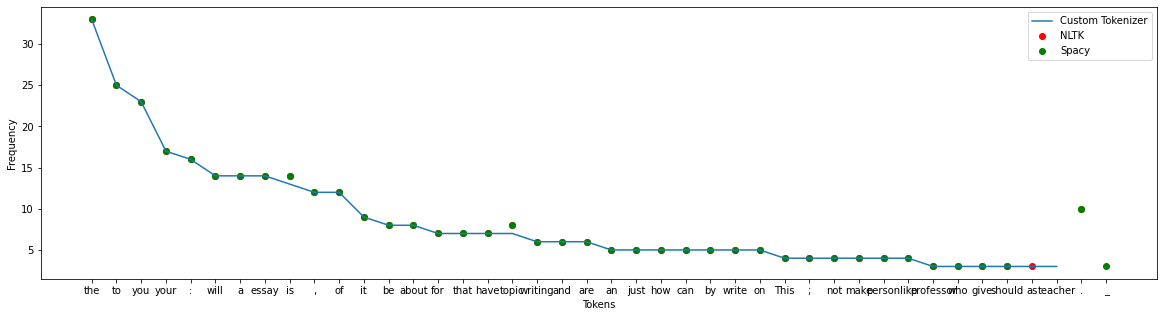

In [88]:
print("==============NLTK as grountTruth==============")
precisionNLTK = calcPrecision(tokensCustom, tokensNLTK)    
recallNLTK = calcRecall(tokensCustom, tokensNLTK)
f1nltkEN = calcF1Score(precisionNLTK, recallNLTK)
print("F1 - Score = ",f1nltkEN)
print("==============SpaCy as grountTruth==============")
precisionSpac = calcPrecision(tokensCustom, tokensSpacy)    
recallSpac = calcRecall(tokensCustom, tokensSpacy)
f1Spac = calcF1Score(precisionSpac, recallSpac)
print("F1 - Score = ",f1Spac)
# dicNLTK = FreqDist(tokensNLTK)
# filter_tokens1 = dict([(m, n) for m, n in dicNLTK.items() if n == 1])
# observed1_1 = len(filter_tokens1)/len(dic)
# top30_1NLTK = FreqDist(tokensNLTK).most_common(30)
# top30_1Truth = FreqDist(groundTruthTokens).most_common(30)

plt.figure(figsize=(20, 5))
plt.plot(*zip(*top30_1Custom),label='Custom Tokenizer')
plt.scatter(*zip(*top30_1NLTK),color = 'red',label='NLTK')
plt.scatter(*zip(*top30_1Spacy),color = 'green',label='Spacy')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()



# precision = calcPrecision(tokensSpacy, groundTruthTokens)    
# recall = calcRecall(tokensSpacy, groundTruthTokens)
# f1spacyEN = calcF1Score(precision, recall)
# print("F1 - Score = ",f1spacyEN)
# dic3 = FreqDist(tokensSpacy)
# filter_tokens3 = dict([(m, n) for m, n in dic3.items() if n == 1])
# observed1_3 = len(filter_tokens3)/len(dic3)
# top30_3 = FreqDist(tokensSpacy).most_common(30)
# top30_3Truth = FreqDist(groundTruthTokens).most_common(30)
# plt.figure(figsize=(15, 5))
# plt.plot(*zip(*top30_3),label='SpaCy en_core_web_sm')
# plt.scatter(*zip(*top30_1Truth),label='GroundTruth',color = 'red')
# plt.xlabel('Tokens')
# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.show()



# precision = calcPrecision(customTokens, groundTruthTokens)    
# recall = calcRecall(customTokens, groundTruthTokens)
# f2custonEN = calcF1Score(precision, recall)
# print("F1 - Score = ",f2custonEN)
# dic4 = FreqDist(customTokens)
# filter_tokens4 = dict([(m, n) for m, n in dic4.items() if n == 1])
# observed1_4 = len(filter_tokens4)/len(dic4)
# top30_4 = FreqDist(customTokens).most_common(30)
# top30_4Truth = FreqDist(groundTruthTokens).most_common(30)
# plt.figure(figsize=(15, 5))
# plt.plot(*zip(*top30_4),label='Custom Tokenizer')
# plt.scatter(*zip(*top30_1Truth),label='GroundTruth',color = 'red')
# plt.xlabel('Tokens')
# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.show()

In [78]:
info = {'percentage of tokens with Frequency = 1 per Tokenizer': ['NLTK word_tokenize','SpaCy','Custom'], 'Frequency = 1 (%)': [observed1_1,observed1_2,observed1_3]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════════════════════════════════════════╤═════════════════════╕
│    │ percentage of tokens with Frequency = 1 per Tokenizer   │   Frequency = 1 (%) │
╞════╪═════════════════════════════════════════════════════════╪═════════════════════╡
│  0 │ NLTK word_tokenize                                      │            0.673004 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  1 │ SpaCy                                                   │            0.666667 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  2 │ Custom                                                  │            0.68797  │
╘════╧═════════════════════════════════════════════════════════╧═════════════════════╛


In [89]:

info = {'Tokenizer': ['NLTK as GroundTruth','SpaCy as GroundTruth'], 'F1-Score': [f1nltkEN,f1Spac],
       'Precision':[precisionNLTK,precisionSpac],'Recall':[recallNLTK,recallSpac]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤══════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer            │   F1-Score │   Precision │   Recall │
╞════╪══════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK as GroundTruth  │   0.975845 │    0.983766 │ 0.968051 │
├────┼──────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ SpaCy as GroundTruth │   0.967121 │    0.978896 │ 0.955626 │
╘════╧══════════════════════╧════════════╧═════════════╧══════════╛
